# [Jonathan Cayer](https://games.crossfit.com/athlete/244172)

<table style="float: left;border-style:hidden">
<tr style="border-style:hidden">
<td>
Age: 28 ans
</td>
</tr>
<tr style="border-style:hidden"><td>
Poids: 220 lbs
</td></tr>
<tr style="border-style:hidden"><td>
Taille:  188 cm
</td></tr>
</table>


<img style="float: right;" src="pic.jpeg">

Le temps qu'a prit chaque répétition a été collecté, avec un [stopwatch](https://itunes.apple.com/ca/app/stopwatch-timer-pro-multiple-count-down-up/id412538313?l=fr&mt=8), pour le WOD 17.1 des  Crossfit Opens 2017. Le temps de transition est comptabilisé dans le temps qu'a prit la première répétion de l'exercice suivant.

L'erreur est humaine, il se peut que les checkpoints ne soient pas parfait. On accorche  le bouton ou encore on oublie de peser.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import datetime
import time
import math

In [4]:
# Read and convert checkpoints
checkpoints = [l.split('-')[1].strip() for l in open('split_times.txt').readlines()[1:-1]][::-1]
checkpoints = np.array([datetime.datetime.strptime(cp, "%H:%M:%S.%f") for cp in checkpoints])

In [5]:
# Convert checkpoints to split times
splits = (checkpoints - np.roll(checkpoints, 1))[1:]
splits = [split.total_seconds() for split in splits]

In [6]:
# Create a few labels
snatch = ['snatch'] * 10
burpees = ['burpees'] * 15
mvmt = []
round_ = []
for i in range(1,6):
    mvmt += ['snatch'] * 10 * i + ['burpees'] * 15
    round_ += ['snatch_{}'.format(i)] * 10 * i + ['burpees_{}'.format(i)] * 15

In [7]:
df = DataFrame(
    {
        "rep": range(1,226),
        "mvmt": mvmt,
        "split": splits,
        "round": round_
    }
)

Quelques détails à observer:
* La hauteur de la  barre des premières répétitions est significativement plus hautes que les autres et ceci est dû au fait que ça comptabilise le temps de transition entre les mouvements
* Il y a une bonne différence de hauteur entre le premier set de vert et le 4e. Les burpees de la 4e rondes étaient presque 2 fois plus lent que la première
* Les snatchs sont quand même constant
* L'avant dernier burpee n'a même pas prit une seconde. C'est fort probablement une erreur de celui qui prenait le temps en note.

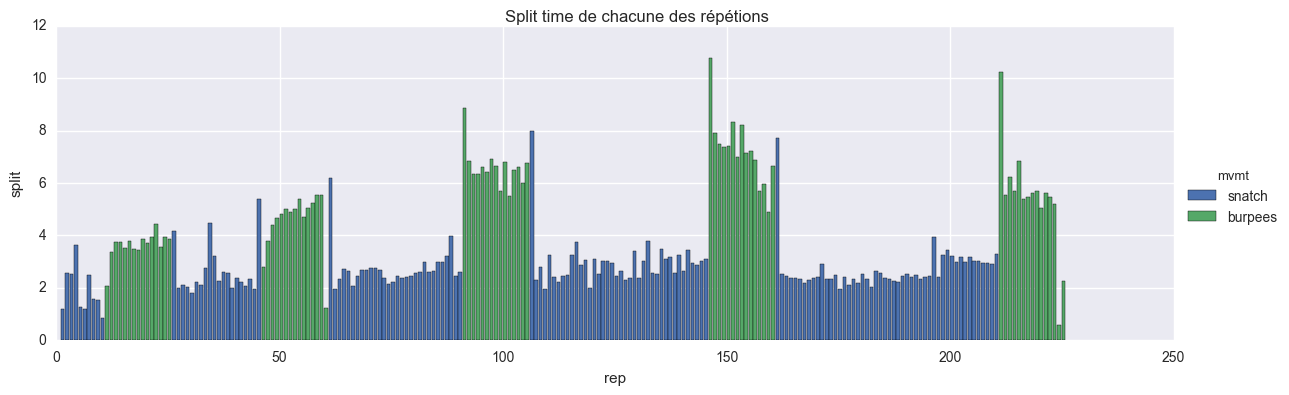

In [8]:
g = sns.FacetGrid(df, size=4, aspect=3, hue='mvmt')
g.map(plt.bar, 'rep', 'split').add_legend()
_ = g.fig.suptitle("Split time de chacune des répétions")

gaucheLes deux graphiques suivant raconte essentiellement la même histoire mais celui de droite est peut-être un peu plus familier. 

Le graphique de gauche montre la moyenne de temps de chaque mouvement à chaque ronde (hauteur des barres) ainsi que la variation de temps (longueur de la barre noire). Idéalement la barre noire est très petites et la hauteur des barres est la même d'une ronde à l'autre.

Le graphique de droite montre où se situe les répétitions en temps. La largeur montre l'importance d'aglomération des répétitions. Plus les reps prennent le même temps, plus c'est large. Idéalement ce serait comme sur un terrain de pratique de tir au fusil, les tirs doivent être aussi groupé que possible. J'aime particulièrement la dernière série de 50 snatches.

> À noter que la dernière série de burpees semble avoir été mal chronométrée un peu, ce qui expliquerait le grand écart de temps (longueur de la barre noire ou l'étendu de la baloune)

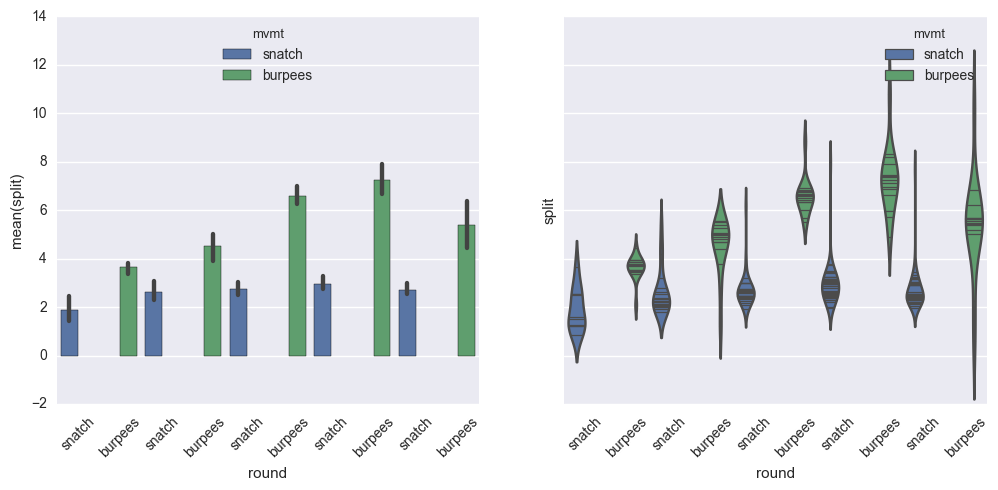

In [9]:
fix, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

g = sns.barplot(data=df, x='round', y='split', hue='mvmt', ax=ax[0])
g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

g = sns.violinplot(data=df, x='round', y='split', hue='mvmt', inner="stick", ax=ax[1])
_ = g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

Petit sommaire des mouvements toutes rondes confondues. Généralement pas trop d'écart pour les snatches et la majorité des burpees avaient moins d'une secondes d'écart entre elles.

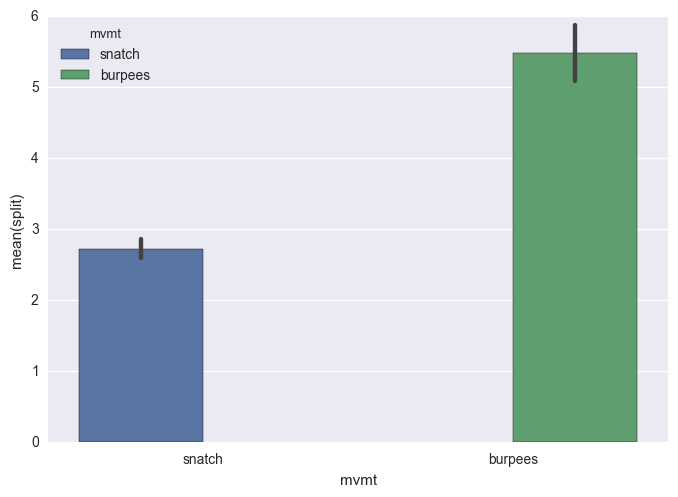

In [10]:
_ = sns.barplot(data=df, x='mvmt', y='split', hue='mvmt')

#### Simple statistiques

* On peut assumer que temps maximum de transition entre snatch et burpees a été de 10,78 secondes
* On peut assumer que temps maximum de transition entre burpees et snatch a été de 7,98 secondes
* Face à la moyenne, les burpees variaient en moyenne de presque 2 secondes
* Face à la moyenne, les snatches variaient en moyenne de presque 1 secondes

In [11]:
df.groupby('mvmt')['split'].describe()

mvmt          
burpees  count     75.000000
         mean       5.481733
         std        1.820073
         min        0.600000
         25%        4.175000
         50%        5.530000
         75%        6.650000
         max       10.780000
snatch   count    150.000000
         mean       2.716133
         std        0.888190
         min        0.850000
         25%        2.332500
         50%        2.535000
         75%        2.997500
         max        7.980000
Name: split, dtype: float64

In [12]:
df.groupby('round')['split'].sum()

round
burpees_1     54.55
burpees_2     68.04
burpees_3     98.84
burpees_4    108.87
burpees_5     80.83
snatch_1      18.89
snatch_2      52.69
snatch_3      82.00
snatch_4     118.50
snatch_5     135.34
Name: split, dtype: float64

### Recommendation finale

* Les snatches sont pas mal constant. Il faut éviter les no reps.
* À noter qu'il n'y a pas de spike de temps dans les snatches. Ça veut dire qu'il n'y a pas vraiment eu de break, ce qui est parfait. e.g. 10-pause-10-pause-10 pour les 30 snatches
* Si on coupe les burpees de la ronde 3, 4 et 5 à 70 secondes max (deux secondes de plus que la deuxième ronde) on enlève un peu plus de 1m18. C'est significatif.

#### Réduire le range of motion

Il est aussi possible de réduire le range of motion dans les snatches. Évidemment on ne peut pas couper la longueur des bras, mais on peut avoir les pieds un peu plus large. Allez hop, trigonométrie! Qui eut cru que ça servirait un jour.

Ça prend la longueur de la jambe à l'intérieur jusqu'au talon. Entre les deux jambes et le sol si on se tient les pieds collés.

In [46]:
def height(feet_distance, h):
    a = feet_distance/2
    angle = np.arccos(a/h)
    return h * np.sin(angle)

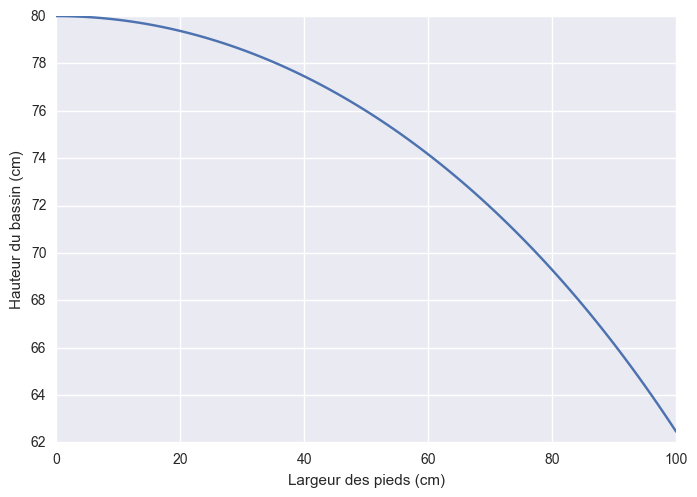

In [77]:
X = np.linspace(0, 100, 100)
y = height(X, 80)
plt.plot(X, y)
plt.xlabel("Largeur des pieds (cm)")
plt.ylabel("Hauteur du bassin (cm)")

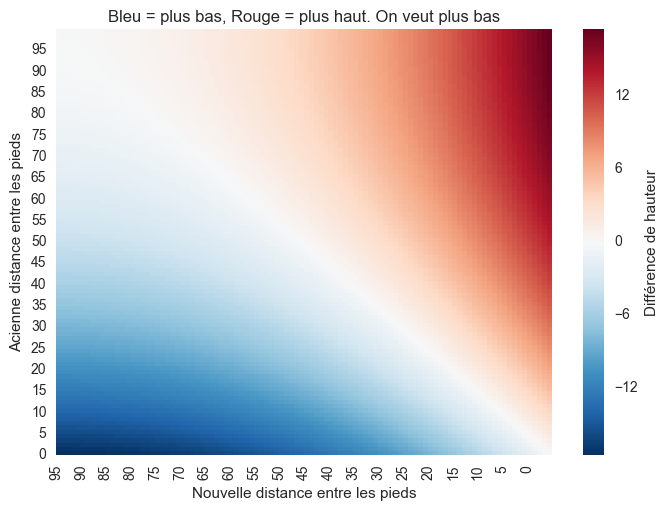

In [78]:
g = sns.heatmap(DataFrame(y[:,np.newaxis]-y), cbar_kws={'label': 'Différence de hauteur'})
g.set_xticks(np.arange(0,100,5))
g.set_xticklabels(np.arange(0,100,5)[::-1])
g.set_xlabel("Nouvelle distance entre les pieds")
g.set_yticks(np.arange(0,100,5))
g.set_yticklabels(np.arange(0,100,5))
g.set_ylabel("Acienne distance entre les pieds")
g.set_title("Bleu = plus bas, Rouge = plus haut. On veut plus bas")

In [66]:
np.arange(0,100,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [67]:
g.set_xticklabels?